Stock Price Prediction using LSTM

This project showcases your understanding of sequential data modeling and demonstrates your ability to handle real-world time series data using LSTM networks.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf

In [23]:
stock_price = yf.download('AAPL',start='2015-01-01',end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [21]:
stock_price.to_csv('AAPL price1')

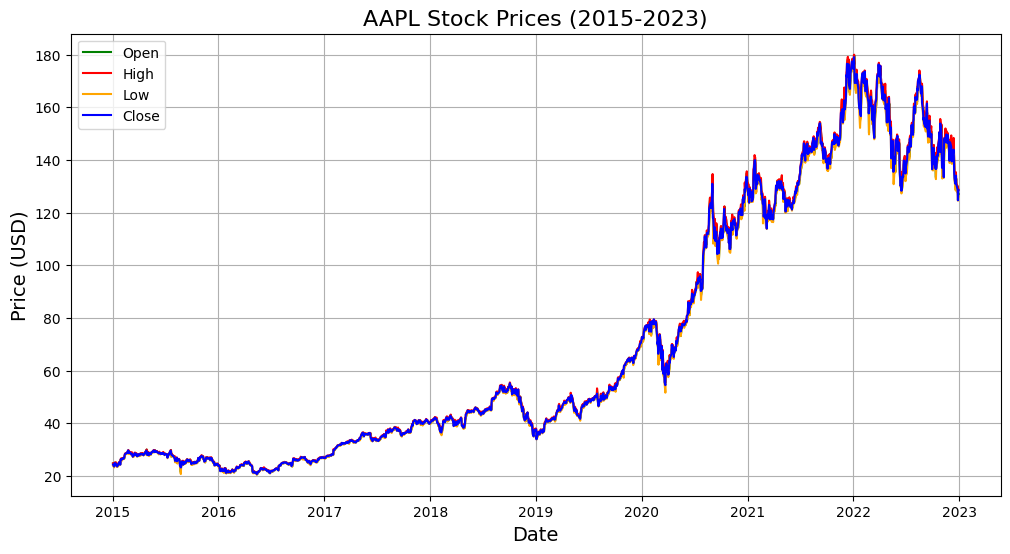

In [24]:
import matplotlib.pyplot as plt

# Plot multiple columns
plt.figure(figsize=(12, 6))
plt.plot(stock_price.index, stock_price['Open'], label='Open', color='green')
plt.plot(stock_price.index, stock_price['High'], label='High', color='red')
plt.plot(stock_price.index, stock_price['Low'], label='Low', color='orange')
plt.plot(stock_price.index, stock_price['Close'], label='Close', color='blue')

# Adding labels and title
plt.title('AAPL Stock Prices (2015-2023)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


. Preprocess the Data

Normalize data for efficient LSTM training.
Create sliding windows of data for sequences.

In [26]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('AAPL price')

<h3 color = 'red '><i>Examine data</i></h3>

In [34]:
import pandas as pd

# Load the data
data = pd.read_csv('AAPL price')

# Quick examination
print("First 5 rows:")
print(data.head())

print("\nDataset shape:", data.shape)

print("\nColumn names:", data.columns)

print("\nSummary:")
print(data.info)

print("\nBasic statistics:")
print(data.describe())

print("\nMissing values per column:")
print(data.isnull().sum())


First 5 rows:
        Price               Close                High                 Low  \
0      Ticker                AAPL                AAPL                AAPL   
1        Date                 NaN                 NaN                 NaN   
2  2015-01-02  24.347169876098633  24.817055016851548  23.906234384658674   
3  2015-01-05  23.661270141601562  24.195736818722285   23.47420773907181   
4  2015-01-06  23.663494110107422   23.92404600379343   23.30050135489903   

                 Open     Volume  
0                AAPL       AAPL  
1                 NaN        NaN  
2   24.80591962148814  212818400  
3   24.11556673220304  257142000  
4  23.725848235192366  263188400  

Dataset shape: (2522, 6)

Column names: Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

Summary:
<bound method DataFrame.info of            Price               Close                High                 Low  \
0         Ticker                AAPL                AAPL                AAP

In [42]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load dataset
data1 = pd.read_csv('AAPL price')

# Ensure the 'Close' column is numeric
data1 = data1[pd.to_numeric(data1['Close'], errors='coerce').notnull()]
close_prices = data1['Close'].astype(float).values.reshape(-1, 1)

# Normalize prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(close_prices)

# Create sequences
sequence_length = 60
X, y = [], []
for i in range(len(scaled_prices) - sequence_length):
    X.append(scaled_prices[i:i+sequence_length])
    y.append(scaled_prices[i+sequence_length])

X, y = np.array(X), np.array(y)

# Check shapes
print("Shape of X:", X.shape)  # (554, 60, 1) for example
print("Shape of y:", y.shape)  # (554, 1) for example


Shape of X: (2460, 60, 1)
Shape of y: (2460, 1)


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)  # Output layer
])

model.compile(optimizer='adam', loss='mean_squared_error')


In [44]:
# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
62/62 [==============================] - 3s 25ms/step - loss: 0.0063 - val_loss: 0.0012
Epoch 2/50
62/62 [==============================] - 1s 21ms/step - loss: 0.0010 - val_loss: 0.0020
Epoch 3/50
62/62 [==============================] - 1s 23ms/step - loss: 8.9891e-04 - val_loss: 0.0025
Epoch 4/50
62/62 [==============================] - 2s 28ms/step - loss: 7.5371e-04 - val_loss: 0.0013
Epoch 5/50
62/62 [==============================] - 1s 22ms/step - loss: 6.8186e-04 - val_loss: 6.7199e-04
Epoch 6/50
62/62 [==============================] - 1s 21ms/step - loss: 6.4236e-04 - val_loss: 0.0012
Epoch 7/50
62/62 [==============================] - 1s 21ms/step - loss: 6.6329e-04 - val_loss: 0.0020
Epoch 8/50
62/62 [==============================] - 1s 20ms/step - loss: 6.6626e-04 - val_loss: 0.0018
Epoch 9/50
62/62 [==============================] - 2s 33ms/step - loss: 6.2905e-04 - val_loss: 0.0037
Epoch 10/50
62/62 [==============================] - 1s 22ms/step - loss: 5.5

In [46]:
# Predict and inverse transform
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Actual values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


16/16 [==============================] - 0s 5ms/step


16/16 [==============================] - 0s 5ms/step


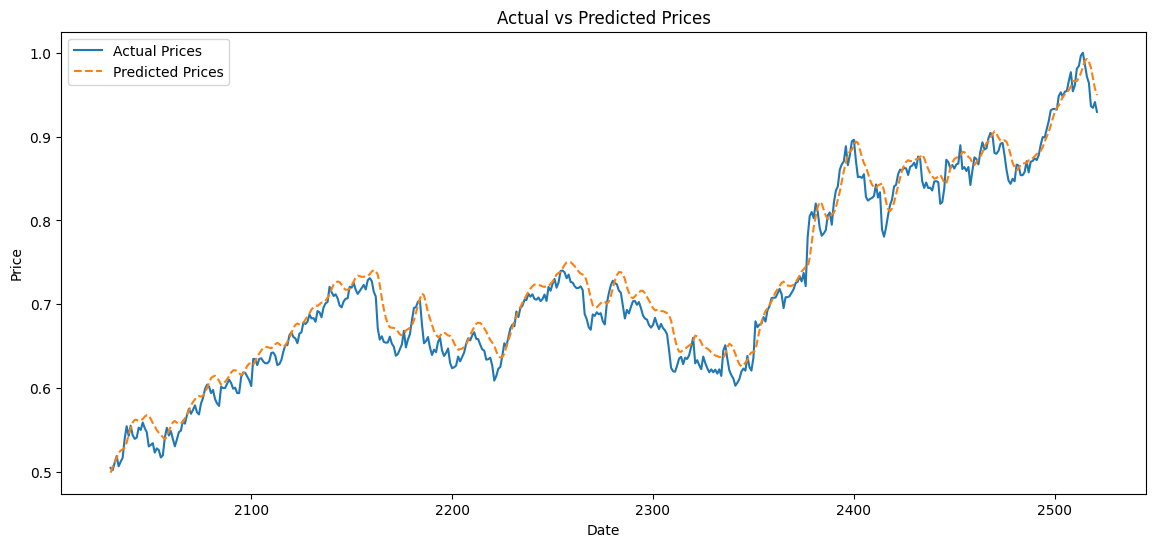

In [50]:
import matplotlib.pyplot as plt

# Ensure y_test_actual is 1D, and predictions are made for the test set
y_test_actual = y_test.reshape(-1)  # Flatten to 1D if needed

# Make predictions with your model (e.g., model.predict(X_test))
predictions = model.predict(X_test)

# Ensure predictions are also 1D
predictions = predictions.reshape(-1)

# Plot the actual vs predicted values
plt.figure(figsize=(14, 6))
plt.plot(data1.index[-len(y_test_actual):], y_test_actual, label='Actual Prices')  # Adjust x-axis for correct test data range
plt.plot(data1.index[-len(predictions):], predictions, label='Predicted Prices', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
